In [1]:
sc

<SparkContext master=yarn appName=PySparkShell>

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing libraries
import pyspark
from pyspark.sql import Row
from pyspark.sql import *
import matplotlib.pyplot as plt
import numpy as np

# 1

In [4]:
# Reading trainingRatings.txt from s3 bucket
a1 = spark.read.text("s3://dsci6007-final-nihal-movie-recommendation/Netflix/Netflix/TrainingRatings.txt").rdd
lt = a1.map(lambda a1: a1.value.split(","))
train_data = lt.map(lambda p: Row(movies_id=int(p[0]), users_id=int(p[1]),
                                     ratings=float(p[2])))

In [5]:
df_train= spark.createDataFrame(train_data)
df_train.show()

[Stage 1:>                                                          (0 + 1) / 1]

+---------+-------+--------+
|movies_id|ratings|users_id|
+---------+-------+--------+
|        8|    1.0| 1744889|
|        8|    2.0| 1395430|
|        8|    4.0| 1205593|
|        8|    4.0| 1488844|
|        8|    1.0| 1447354|
|        8|    4.0|  306466|
|        8|    4.0| 1331154|
|        8|    3.0| 1818178|
|        8|    4.0|  991725|
|        8|    4.0| 1987434|
|        8|    4.0| 1765381|
|        8|    3.0|  433803|
|        8|    2.0| 1148143|
|        8|    5.0| 1174811|
|        8|    3.0| 1684516|
|        8|    4.0|  754781|
|        8|    4.0|  567025|
|        8|    4.0| 1623132|
|        8|    3.0| 1567095|
|        8|    5.0| 1666394|
+---------+-------+--------+
only showing top 20 rows



In [6]:
df_train_plot=df_train.toPandas()
df_train_plot

,movies_id,ratings,users_id
0,8,1.0,1744889
1,8,2.0,1395430
2,8,4.0,1205593
3,8,4.0,1488844
4,8,1.0,1447354
...,...,...,...
3255347,17742,3.0,46222
3255348,17742,1.0,2534701
3255349,17742,3.0,208724
3255350,17742,2.0,483107


In [7]:
df_train_plot.groupby('ratings').count()

,movies_id,users_id
ratings,,
1.0,169886,169886
2.0,374452,374452
3.0,1048538,1048538
4.0,1044293,1044293
5.0,618183,618183


<AxesSubplot:ylabel='ratings'>

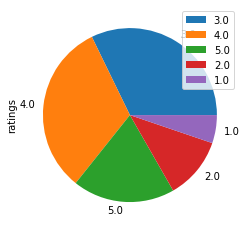

In [8]:
df_train_plot['ratings'].value_counts().plot(kind='pie',legend=True)

In [9]:
df_train.createOrReplaceTempView("df1")

In [10]:
print('The distinct numbers users in training data \n ')
spark.sql("select count(distinct(users_id)) from df1").show()

The distinct numbers users in training data 
 


21/12/15 21:34:15 WARN HiveConf: HiveConf of name hive.server2.thrift.url does not exist
[Stage 3:=============================>                             (4 + 4) / 8]21/12/15 21:34:30 WARN Utils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.debug.maxToStringFields' in SparkEnv.conf.


+------------------------+
|count(DISTINCT users_id)|
+------------------------+
|                   28978|
+------------------------+



In [11]:
print('The distinct numbers movies in training data \n ')
spark.sql("select count(distinct(movies_id)) from df1").show()

The distinct numbers movies in training data 
 


[Stage 9:============================================>              (6 + 2) / 8]

+-------------------------+
|count(DISTINCT movies_id)|
+-------------------------+
|                     1821|
+-------------------------+



In [12]:
spark.sql('SELECT COUNT(*) FROM df1').show()

[Stage 15:==================================================>       (7 + 1) / 8]

+--------+
|count(1)|
+--------+
| 3255352|
+--------+



In [13]:
print('The net average rating in the data set is \n')
spark.sql('Select AVG(ratings) from df1').show()

The net average rating in the data set is 



[Stage 18:==================================================>       (7 + 1) / 8]

+-----------------+
|     avg(ratings)|
+-----------------+
|3.481187595074204|
+-----------------+



In [14]:
print('The net average rating respective to movies are \n')
spark.sql('Select AVG(ratings) as mean_ratings,movies_id from df1 group by movies_id Order by mean_ratings DESC').show()

The net average rating respective to movies are 



[Stage 21:==================================================>       (7 + 1) / 8]

+-----------------+---------+
|     mean_ratings|movies_id|
+-----------------+---------+
|              4.5|     3033|
|4.464598134454594|    12293|
|4.422818791946309|    16147|
|4.418618618618619|    14283|
|4.414830736163353|     1256|
|4.410690051153565|     5760|
| 4.38388625592417|     7569|
|4.372822299651568|     4238|
| 4.35288414929714|    14648|
|4.339868147120056|     3290|
|4.339148474704135|    10947|
|4.318296583066823|    10080|
|4.318181818181818|     7016|
|4.283419689119171|    17085|
|4.234884732492388|     3928|
|4.234758013827781|     4207|
|4.230476707863643|    12184|
|4.218554861730597|    15557|
|4.198757763975156|     7445|
|4.195422535211268|      634|
+-----------------+---------+
only showing top 20 rows



In [15]:
print('The net average rating respective to users are \n')
spark.sql('Select AVG(ratings) as mean_ratings,users_id from df1 group by users_id Order by mean_ratings DESC').show()

The net average rating respective to users are 



[Stage 24:===========================================>              (6 + 2) / 8]

+------------------+--------+
|      mean_ratings|users_id|
+------------------+--------+
|               5.0| 1482568|
|               5.0|  396595|
|               5.0|  784490|
|               5.0| 1309838|
|               5.0| 1663569|
|               5.0| 1745577|
|               5.0| 1193505|
|               5.0| 2307226|
|               5.0| 2451667|
|               5.0|  336578|
| 4.996108949416342|  794999|
| 4.989247311827957| 1379159|
| 4.987341772151899|  175935|
| 4.987179487179487|  642384|
| 4.987179487179487| 1299754|
| 4.982142857142857| 2635943|
| 4.977777777777778|  132333|
|4.9753086419753085|   27318|
|4.9753086419753085| 1293835|
|  4.97457627118644|  223526|
+------------------+--------+
only showing top 20 rows



# 2 a

In [16]:
a2 = spark.read.text("s3://dsci6007-final-nihal-movie-recommendation/Netflix/Netflix/TestingRatings.txt").rdd
lt2 = a2.map(lambda a2: a2.value.split(","))
ratingsRDD = lt2.map(lambda p: Row(movies_id=int(p[0]), users_id=int(p[1]),
                                     ratings=float(p[2])))

In [17]:
df_test = spark.createDataFrame(ratingsRDD)

In [18]:
df_test.show()

+---------+-------+--------+
|movies_id|ratings|users_id|
+---------+-------+--------+
|        8|    1.0|  573364|
|        8|    3.0| 2149668|
|        8|    3.0| 1089184|
|        8|    3.0| 2465894|
|        8|    1.0|  534508|
|        8|    4.0|  992921|
|        8|    4.0|  595054|
|        8|    4.0| 1298304|
|        8|    4.0| 1661600|
|        8|    2.0|  553787|
|        8|    3.0| 1309839|
|        8|    1.0|  727242|
|        8|    4.0| 1437668|
|        8|    1.0| 2170930|
|        8|    5.0| 1780876|
|        8|    3.0|    9660|
|        8|    4.0| 2379200|
|        8|    5.0|  563186|
|        8|    4.0| 1539617|
|        8|    1.0| 1656839|
+---------+-------+--------+
only showing top 20 rows



In [19]:
type(df_test)

pyspark.sql.dataframe.DataFrame

# Distinct users are there in the test set (TestingRatings.txt) 

In [20]:
# creating a temporary view of 
# Dataframe and storing it into df2
df_test.createOrReplaceTempView("df2")
  
# using the SQL query to count all
# distinct records and display the
# count on the screen
a=spark.sql("select count(distinct(users_id)) from df2")

In [21]:
print('The number of distinct users are \n')
a.show()

The number of distinct users are 



[Stage 29:>                                                         (0 + 1) / 1]

+------------------------+
|count(DISTINCT users_id)|
+------------------------+
|                   27555|
+------------------------+



#  Distinct movies/items are there in the test set (TestingRatings.txt) 

In [22]:
print('The number of unique movies in testing data sets are \n')
spark.sql("select count(distinct(movies_id)) from df2").show()

The number of unique movies in testing data sets are 



[Stage 35:>                                                         (0 + 1) / 1]

+-------------------------+
|count(DISTINCT movies_id)|
+-------------------------+
|                     1701|
+-------------------------+



# Creating Pivot Table

In [23]:
pivotDF = df_train.groupBy("users_id").pivot("movies_id").avg("ratings")

In [24]:
pivotDF=pivotDF.na.fill(value=0)

In [25]:
pivotDF.show(truncate=True)

[Stage 52:>                                                         (0 + 1) / 1]

+--------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---

In [26]:
pivotDF.show(2)

[Stage 58:>                                                         (0 + 1) / 1]

+--------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---

# Finding correlation matrix 

In [27]:
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.stat import Correlation

In [28]:
# https://www.py4u.net/discuss/1629724
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=pivotDF.columns, outputCol=vector_col)
df_vector = assembler.transform(pivotDF).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col)

In [29]:
pivotDF.toPandas().shape

/usr/lib/spark/python/pyspark/sql/dataframe.py:2197: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_name] = series


(28978, 1822)

# Printing correlation matrix

In [30]:
print('The correlation matrix is \n')
matrix.collect()[0]["pearson({})".format(vector_col)].values.reshape(1822,1822)

The correlation matrix is 



array([[ 1.        ,  0.00711263,  0.00268995, ..., -0.00242059,
        -0.0035434 , -0.00498575],
       [ 0.00711263,  1.        , -0.04214597, ...,  0.02643061,
         0.00598026,  0.01893403],
       [ 0.00268995, -0.04214597,  1.        , ...,  0.00274657,
         0.01577163,  0.00348133],
       ...,
       [-0.00242059,  0.02643061,  0.00274657, ...,  1.        ,
         0.01862499,  0.03201823],
       [-0.0035434 ,  0.00598026,  0.01577163, ...,  0.01862499,
         1.        ,  0.01410172],
       [-0.00498575,  0.01893403,  0.00348133, ...,  0.03201823,
         0.01410172,  1.        ]])

In [ ]:
# Average overlap of items rated by the users in the training set for users in the test set 

In [86]:
userItemRating = df_train.toPandas().pivot_table(index='users_id', columns='movies_id', values='ratings')

movies_id,8,28,43,48,61,64,66,92,96,111,...,17654,17660,17689,17693,17706,17725,17728,17734,17741,17742
users_id,,,,,,,,,,,,,,,,,,,,,
7,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
userItemRating.fillna(0, inplace = True)
userMovieRating = userItemRating.astype(np.int32)

movies_id,8,28,43,48,61,64,66,92,96,111,...,17654,17660,17689,17693,17706,17725,17728,17734,17741,17742
users_id,,,,,,,,,,,,,,,,,,,,,
7,5,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
481,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
def average(user):
    summed =0
    count =0

    for i in range(len(user)):
        if(user[i]==0):
            summed = summed +0
        else:
            summed= user[i] +summed
            count= 1+ count
    avgg=summed/count
    return avgg

In [94]:
user1664010= list(userMovieRating.loc[1664010])
avg1664010= average(user1664010)
user305344 = list(userMovieRating.loc[305344])
avg305344 = average(user305344)
user387418 = list(userMovieRating.loc[387418])
avg387418= average(user387418)

In [ ]:
# Average overlap of items rated by the users in the training set for users in the test set 

In [104]:
print('the average is ',sum([avg1664010,avg305344,avg387418])/3)

the average is  2.6611384274931473


In [105]:
movieUserRating = df_train.toPandas().pivot_table(index='movies_id', columns='users_id', values='ratings')

In [106]:
movieUserRating.fillna(0, inplace = True)
movieUserRating = movieUserRating.astype(np.int32)

In [108]:
movie6971= list(movieUserRating.loc[6971])
avg6971= average(movie6971)
movie4640= list(movieUserRating.loc[4640])
avg4640 = average(movie4640)
movie4432= list(movieUserRating.loc[4432])
avg4432 = average(movie4432)

In [110]:
# Average overlap of users-movie the  in the training set for users in the test set 

In [109]:
print('the average is ',sum([avg6971,avg4640,avg4432])/3)

the average is  3.9304672123509015


In [32]:
pivotDF.toPandas()

,users_id,8,28,43,48,61,64,66,92,96,...,17654,17660,17689,17693,17706,17725,17728,17734,17741,17742
0,1026162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1055451,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2503600,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2150155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1111598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28973,659133,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28974,1861186,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28975,310799,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28976,542657,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3

In [44]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

In [45]:
a3 = spark.read.text("s3://dsci6007-final-nihal-movie-recommendation/Netflix/Netflix/movie_titles.txt").rdd
lt3 = a3.map(lambda a2: a2.value.split(","))
movies_info = lt3.map(lambda p: Row(movies_id_k=int(p[0]), release_year=(p[1]),
                                     movie_name=(p[2])))

In [46]:
df_movie= spark.createDataFrame(movies_info)
df_movie.show()

+--------------------+-----------+------------+
|          movie_name|movies_id_k|release_year|
+--------------------+-----------+------------+
|     Dinosaur Planet|          1|        2003|
|Isle of Man TT 20...|          2|        2004|
|           Character|          3|        1997|
|Paula Abdul's Get...|          4|        1994|
|The Rise and Fall...|          5|        2004|
|                Sick|          6|        1997|
|               8 Man|          7|        1992|
|What the #$*! Do ...|          8|        2004|
|Class of Nuke 'Em...|          9|        1991|
|             Fighter|         10|        2001|
|Full Frame: Docum...|         11|        1999|
|My Favorite Brunette|         12|        1947|
|Lord of the Rings...|         13|        2003|
|  Nature: Antarctica|         14|        1982|
|Neil Diamond: Gre...|         15|        1988|
|           Screamers|         16|        1996|
|           7 Seconds|         17|        2005|
|    Immortal Beloved|         18|      

In [47]:
df_train_complete =df_train.join(df_movie,df_train['movies_id']==df_movie['movies_id_k'],'inner')
df_test_complete =df_test.join(df_movie,df_test['movies_id']==df_movie['movies_id_k'],'inner')


In [48]:
df_train_complete.show()

[Stage 87:====================================>                     (5 + 3) / 8]

+---------+-------+--------+----------+-----------+------------+
|movies_id|ratings|users_id|movie_name|movies_id_k|release_year|
+---------+-------+--------+----------+-----------+------------+
|      541|    1.0|  403531|King Cobra|        541|        1998|
|      541|    2.0| 1532735|King Cobra|        541|        1998|
|      541|    3.0| 1830096|King Cobra|        541|        1998|
|      541|    3.0| 1173459|King Cobra|        541|        1998|
|      541|    1.0| 1808930|King Cobra|        541|        1998|
|      541|    2.0| 1181550|King Cobra|        541|        1998|
|      541|    3.0| 1189269|King Cobra|        541|        1998|
|      541|    3.0|  235789|King Cobra|        541|        1998|
|      541|    3.0| 2027956|King Cobra|        541|        1998|
|      541|    3.0| 1314869|King Cobra|        541|        1998|
|      541|    2.0| 1166912|King Cobra|        541|        1998|
|      541|    1.0| 2439493|King Cobra|        541|        1998|
|      541|    1.0| 10347

In [49]:
df_test_complete.show()

[Stage 93:>                                                         (0 + 1) / 1]

+---------+-------+--------+--------------------+-----------+------------+
|movies_id|ratings|users_id|          movie_name|movies_id_k|release_year|
+---------+-------+--------+--------------------+-----------+------------+
|     7747|    3.0| 1455446|         Korn: Deuce|       7747|        2002|
|      541|    2.0| 1978089|          King Cobra|        541|        1998|
|     9691|    5.0|  755939|ECW: The Best of ...|       9691|        2001|
|     9691|    4.0| 1054182|ECW: The Best of ...|       9691|        2001|
|     6885|    1.0| 2439493|       Seasons: IMAX|       6885|        1987|
|    12422|    3.0| 1462211|     The Murder Room|      12422|        2004|
|    12422|    4.0| 1612901|     The Murder Room|      12422|        2004|
|    11673|    3.0| 1502634|            Drumline|      11673|        2002|
|    11673|    4.0| 2621862|            Drumline|      11673|        2002|
|    11673|    3.0|  845634|            Drumline|      11673|        2002|
|    11673|    5.0|  5384

# Item based collaborative filtering prediction

# ALS parameters are maxIter =5, regParam= 0.05

In [50]:
%%time
als = ALS(maxIter=5, regParam=0.05, userCol="users_id", itemCol="movies_id", ratingCol="ratings",coldStartStrategy="drop")
item_based = als.fit(df_train_complete)

In [51]:
%%time
item_based_prediction = item_based.transform(df_test_complete)
item_based_prediction.show()

[Stage 145:>                                                        (0 + 1) / 1]

+---------+-------+--------+--------------------+-----------+------------+----------+
|movies_id|ratings|users_id|          movie_name|movies_id_k|release_year|prediction|
+---------+-------+--------+--------------------+-----------+------------+----------+
|     7747|    3.0| 1455446|         Korn: Deuce|       7747|        2002| 2.7377844|
|      541|    2.0| 1978089|          King Cobra|        541|        1998| 1.8783076|
|     9691|    5.0|  755939|ECW: The Best of ...|       9691|        2001|  3.603371|
|     9691|    4.0| 1054182|ECW: The Best of ...|       9691|        2001|  3.101326|
|     6885|    1.0| 2439493|       Seasons: IMAX|       6885|        1987| 1.0134926|
|    12422|    3.0| 1462211|     The Murder Room|      12422|        2004| 3.3535805|
|    12422|    4.0| 1612901|     The Murder Room|      12422|        2004| 3.8723545|
|    11673|    3.0| 1502634|            Drumline|      11673|        2002|   2.90867|
|    11673|    4.0| 2621862|            Drumline|     

In [52]:
m_s_e = RegressionEvaluator(metricName="mse", labelCol="ratings",predictionCol="prediction")                                     
r_m_s_e= RegressionEvaluator(metricName="rmse", labelCol="ratings",predictionCol="prediction")

In [53]:
root_mean_squared_error = r_m_s_e.evaluate(item_based_prediction)
mean_squared_error = m_s_e.evaluate(item_based_prediction)

In [54]:
print("Mean squared error = ",mean_squared_error)
print("Root-mean-square error = ", root_mean_squared_error)

Mean squared error =  0.7397607369766114
Root-mean-square error =  0.8600934466536828


# ALS parameters are maxIter =10, regParam= 0.025

In [55]:
%%time
als = ALS(maxIter=10, regParam=0.025, userCol="users_id", itemCol="movies_id", ratingCol="ratings",coldStartStrategy="drop")
item_based = als.fit(df_train_complete)

In [56]:
%%time
item_based_prediction = item_based.transform(df_test_complete)
item_based_prediction.show()

[Stage 303:>                                                        (0 + 1) / 1]

+---------+-------+--------+--------------------+-----------+------------+----------+
|movies_id|ratings|users_id|          movie_name|movies_id_k|release_year|prediction|
+---------+-------+--------+--------------------+-----------+------------+----------+
|     7747|    3.0| 1455446|         Korn: Deuce|       7747|        2002| 2.0054672|
|      541|    2.0| 1978089|          King Cobra|        541|        1998| 1.8377641|
|     9691|    5.0|  755939|ECW: The Best of ...|       9691|        2001|   3.99873|
|     9691|    4.0| 1054182|ECW: The Best of ...|       9691|        2001| 3.3504262|
|     6885|    1.0| 2439493|       Seasons: IMAX|       6885|        1987| 1.2157722|
|    12422|    3.0| 1462211|     The Murder Room|      12422|        2004| 3.3497899|
|    12422|    4.0| 1612901|     The Murder Room|      12422|        2004| 4.3492656|
|    11673|    3.0| 1502634|            Drumline|      11673|        2002|  2.919311|
|    11673|    4.0| 2621862|            Drumline|     

In [57]:
m_s_e = RegressionEvaluator(metricName="mse", labelCol="ratings",predictionCol="prediction")                                     
r_m_s_e= RegressionEvaluator(metricName="rmse", labelCol="ratings",predictionCol="prediction")

In [58]:
root_mean_squared_error = r_m_s_e.evaluate(item_based_prediction)
mean_squared_error = m_s_e.evaluate(item_based_prediction)

In [59]:
print("Mean squared error = ",mean_squared_error)
print("Root-mean-square error = ", root_mean_squared_error)

Mean squared error =  0.7044938575350741
Root-mean-square error =  0.839341323619345


# User based collaborative prediction

# ALS parameters are maxIter =5, regParam= 0.05

In [60]:
%%time
als = ALS(maxIter=5, regParam=0.05, userCol="movies_id", itemCol="users_id", ratingCol="ratings",coldStartStrategy="drop")

user_based = als.fit(df_train_complete)

In [61]:
%%time
predict_user_based = user_based.transform(df_test_complete)
predict_user_based.show()

[Stage 482:>                                                        (0 + 1) / 1]

+---------+-------+--------+--------------------+-----------+------------+----------+
|movies_id|ratings|users_id|          movie_name|movies_id_k|release_year|prediction|
+---------+-------+--------+--------------------+-----------+------------+----------+
|     7747|    3.0| 1455446|         Korn: Deuce|       7747|        2002| 1.2515497|
|      541|    2.0| 1978089|          King Cobra|        541|        1998| 2.1432834|
|     9691|    5.0|  755939|ECW: The Best of ...|       9691|        2001| 3.6869907|
|     9691|    4.0| 1054182|ECW: The Best of ...|       9691|        2001|  3.661671|
|     6885|    1.0| 2439493|       Seasons: IMAX|       6885|        1987| 1.3546889|
|    12422|    3.0| 1462211|     The Murder Room|      12422|        2004| 3.0907428|
|    12422|    4.0| 1612901|     The Murder Room|      12422|        2004|  4.068041|
|    11673|    3.0| 1502634|            Drumline|      11673|        2002| 3.1982446|
|    11673|    4.0| 2621862|            Drumline|     

In [62]:
m_s_e = RegressionEvaluator(metricName="mse", labelCol="ratings",predictionCol="prediction")
                                            
r_m_s_e= RegressionEvaluator(metricName="rmse", labelCol="ratings",predictionCol="prediction")

In [63]:
root_mean_squared_error = r_m_s_e.evaluate(predict_user_based)
mean_squared_error = m_s_e.evaluate(predict_user_based)

In [64]:
print("Mean squared error = ",mean_squared_error)
print("Root-mean-square error = ", root_mean_squared_error)


Mean squared error =  0.6951286848710113
Root-mean-square error =  0.8337437765111122


# ALS parameters are maxIter =10, regParam= 0.025

In [65]:
%%time
als = ALS(maxIter=10, regParam=0.025, userCol="movies_id", itemCol="users_id", ratingCol="ratings",coldStartStrategy="drop")

user_based = als.fit(df_train_complete)

In [66]:
%%time
predict_user_based = user_based.transform(df_test_complete)
predict_user_based.show()

[Stage 668:>                                                        (0 + 1) / 1]

+---------+-------+--------+--------------------+-----------+------------+----------+
|movies_id|ratings|users_id|          movie_name|movies_id_k|release_year|prediction|
+---------+-------+--------+--------------------+-----------+------------+----------+
|     7747|    3.0| 1455446|         Korn: Deuce|       7747|        2002|  1.538761|
|      541|    2.0| 1978089|          King Cobra|        541|        1998|  2.250167|
|     9691|    5.0|  755939|ECW: The Best of ...|       9691|        2001| 3.4866724|
|     9691|    4.0| 1054182|ECW: The Best of ...|       9691|        2001| 3.6979902|
|     6885|    1.0| 2439493|       Seasons: IMAX|       6885|        1987| 1.4119432|
|    12422|    3.0| 1462211|     The Murder Room|      12422|        2004| 3.4793437|
|    12422|    4.0| 1612901|     The Murder Room|      12422|        2004| 4.3288074|
|    11673|    3.0| 1502634|            Drumline|      11673|        2002| 3.3856142|
|    11673|    4.0| 2621862|            Drumline|     

In [67]:
m_s_e = RegressionEvaluator(metricName="mse", labelCol="ratings",predictionCol="prediction")
                                            
r_m_s_e= RegressionEvaluator(metricName="rmse", labelCol="ratings",predictionCol="prediction")

In [68]:
root_mean_squared_error = r_m_s_e.evaluate(predict_user_based)
mean_squared_error = m_s_e.evaluate(predict_user_based)

In [69]:
print("Mean squared error = ",mean_squared_error)
print("Root mean square error = ", root_mean_squared_error)


Mean squared error =  0.6937943274332401
Root mean square error =  0.8329431717909933


In [70]:
user_based_recomendation=user_based.recommendForAllUsers(15)
item_based_recommendation=item_based.recommendForAllItems(15)

# List of recommended movies for user-based

In [71]:
user_based_recomendation.show(15)

[Stage 822:==================================================>   (94 + 6) / 100]

+---------+--------------------+
|movies_id|     recommendations|
+---------+--------------------+
|     4190|[[85493, 7.171589...|
|     3220|[[2637974, 5.9391...|
|    11240|[[2288889, 7.7771...|
|     6110|[[2548453, 5.4065...|
|     8260|[[2637974, 5.3497...|
|    16232|[[1579340, 5.0451...|
|     9492|[[868600, 7.02004...|
|      192|[[1396694, 5.6944...|
|     9482|[[1025592, 5.9889...|
|     6522|[[2161891, 6.8652...|
|    10082|[[428653, 5.03126...|
|      122|[[642384, 5.08490...|
|    12184|[[2382844, 6.2303...|
|     9324|[[1463419, 5.6980...|
|     8354|[[1386537, 6.1284...|
+---------+--------------------+
only showing top 15 rows



# List of recommended movies for item-based

In [72]:
item_based_recommendation.show(15)

[Stage 877:==================================================>   (94 + 6) / 100]

+---------+--------------------+
|movies_id|     recommendations|
+---------+--------------------+
|      481|[[66568, 4.979231...|
|     6911|[[1663569, 5.1787...|
|    11041|[[1708366, 5.6008...|
|    15841|[[794999, 5.19199...|
|    15051|[[2443690, 5.9189...|
|     8851|[[1925991, 5.0928...|
|     1061|[[2637974, 5.4277...|
|    16283|[[2239984, 4.9998...|
|    12293|[[991671, 5.90652...|
|    12273|[[642384, 5.01940...|
|    12755|[[888630, 6.14170...|
|    12705|[[1523477, 5.1514...|
|     2675|[[761430, 4.67298...|
|     5465|[[835473, 5.09776...|
|    10845|[[2536520, 5.5785...|
+---------+--------------------+
only showing top 15 rows



# Creating my ratings

In [73]:
# TODO: Replace <FILL IN> with appropriate code
from pyspark.sql import Row
my_user_id = 0

# Note that the movie IDs are the *last* number on each line. A common error was to use the number of ratings as the movie ID.
my_rated_movies = [(192,5,0),(9482,4,0),(6522,3,0),(122,2,0),(9324,1,0)]

my_ratings = sqlContext.createDataFrame(my_rated_movies, ['movies_id','ratings','users_id'])
my_ratings.show()

+---------+-------+--------+
|movies_id|ratings|users_id|
+---------+-------+--------+
|      192|      5|       0|
|     9482|      4|       0|
|     6522|      3|       0|
|      122|      2|       0|
|     9324|      1|       0|
+---------+-------+--------+



In [74]:
df_my_rating =my_ratings.join(df_movie,my_ratings['movies_id']==df_movie['movies_id_k'],'inner')
df_my_rating.show()

+---------+-------+--------+--------------------+-----------+------------+
|movies_id|ratings|users_id|          movie_name|movies_id_k|release_year|
+---------+-------+--------+--------------------+-----------+------------+
|      122|      2|       0|   Cube 2: Hypercube|        122|        2002|
|      192|      5|       0|       The SoulTaker|        192|        2003|
|     9482|      4|       0|Inspector Morse 2...|       9482|        1992|
|     6522|      3|       0|Trailer Park Boys...|       6522|        2001|
|     9324|      1|       0|The Mrs. Bradley ...|       9324|        1999|
+---------+-------+--------+--------------------+-----------+------------+



In [75]:
df_concat = df_train_complete.union(df_my_rating)
df_concat.show()

[Stage 921:==========================================>              (6 + 2) / 8]

+---------+-------+--------+----------+-----------+------------+
|movies_id|ratings|users_id|movie_name|movies_id_k|release_year|
+---------+-------+--------+----------+-----------+------------+
|      541|    1.0|  403531|King Cobra|        541|        1998|
|      541|    2.0| 1532735|King Cobra|        541|        1998|
|      541|    3.0| 1830096|King Cobra|        541|        1998|
|      541|    3.0| 1173459|King Cobra|        541|        1998|
|      541|    1.0| 1808930|King Cobra|        541|        1998|
|      541|    2.0| 1181550|King Cobra|        541|        1998|
|      541|    3.0| 1189269|King Cobra|        541|        1998|
|      541|    3.0|  235789|King Cobra|        541|        1998|
|      541|    3.0| 2027956|King Cobra|        541|        1998|
|      541|    3.0| 1314869|King Cobra|        541|        1998|
|      541|    2.0| 1166912|King Cobra|        541|        1998|
|      541|    1.0| 2439493|King Cobra|        541|        1998|
|      541|    1.0| 10347

In [76]:
df_concat.createOrReplaceTempView("my")
spark.sql("select * from my where users_id=0").show()

+---------+-------+--------+--------------------+-----------+------------+
|movies_id|ratings|users_id|          movie_name|movies_id_k|release_year|
+---------+-------+--------+--------------------+-----------+------------+
|      122|    2.0|       0|   Cube 2: Hypercube|        122|        2002|
|      192|    5.0|       0|       The SoulTaker|        192|        2003|
|     9482|    4.0|       0|Inspector Morse 2...|       9482|        1992|
|     6522|    3.0|       0|Trailer Park Boys...|       6522|        2001|
|     9324|    1.0|       0|The Mrs. Bradley ...|       9324|        1999|
+---------+-------+--------+--------------------+-----------+------------+



In [77]:
df_concat.toPandas().count()

movies_id       3255357
ratings         3255357
users_id        3255357
movie_name      3255357
movies_id_k     3255357
release_year    3255357
dtype: int64

In [78]:
# Checking if the dataframes are concatenated or not
df_concat.toPandas().count()-df_train_complete.toPandas().count()

movies_id       5
ratings         5
users_id        5
movie_name      5
movies_id_k     5
release_year    5
dtype: int64

# Predicting my ratings

In [79]:
als = ALS(maxIter=10, regParam=0.025, userCol="movies_id", itemCol="users_id", ratingCol="ratings",coldStartStrategy="drop")

user_based = als.fit(df_concat)

In [80]:
predict_user_based = user_based.transform(df_my_rating)
predict_user_based.show()

+---------+-------+--------+--------------------+-----------+------------+----------+
|movies_id|ratings|users_id|          movie_name|movies_id_k|release_year|prediction|
+---------+-------+--------+--------------------+-----------+------------+----------+
|      122|      2|       0|   Cube 2: Hypercube|        122|        2002| 2.0894089|
|      192|      5|       0|       The SoulTaker|        192|        2003|  4.939037|
|     9482|      4|       0|Inspector Morse 2...|       9482|        1992| 3.5105457|
|     6522|      3|       0|Trailer Park Boys...|       6522|        2001| 2.9674296|
|     9324|      1|       0|The Mrs. Bradley ...|       9324|        1999| 1.3730624|
+---------+-------+--------+--------------------+-----------+------------+----------+



In [81]:
# Actual Ratings Vs Predicted Ratings

In [82]:
predict_user_based.createOrReplaceTempView("my_ratings")
spark.sql("select * from my_ratings where users_id=0").show()

+---------+-------+--------+--------------------+-----------+------------+----------+
|movies_id|ratings|users_id|          movie_name|movies_id_k|release_year|prediction|
+---------+-------+--------+--------------------+-----------+------------+----------+
|      122|      2|       0|   Cube 2: Hypercube|        122|        2002| 2.0894089|
|      192|      5|       0|       The SoulTaker|        192|        2003|  4.939037|
|     9482|      4|       0|Inspector Morse 2...|       9482|        1992| 3.5105457|
|     6522|      3|       0|Trailer Park Boys...|       6522|        2001| 2.9674296|
|     9324|      1|       0|The Mrs. Bradley ...|       9324|        1999| 1.3730624|
+---------+-------+--------+--------------------+-----------+------------+----------+



In [83]:
m_s_e = RegressionEvaluator(metricName="mse", labelCol="ratings",predictionCol="prediction")                                     
r_m_s_e= RegressionEvaluator(metricName="rmse", labelCol="ratings",predictionCol="prediction")
root_mean_squared_error = r_m_s_e.evaluate(predict_user_based)
mean_squared_error = m_s_e.evaluate(predict_user_based)
print("Mean squared error = ",mean_squared_error)
print("Root mean square error = ", root_mean_squared_error)

Mean squared error =  0.07830245937085464
Root mean square error =  0.27982576609535914
